In [1]:
%matplotlib nbagg
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
primary=pd.read_csv("primary_results.csv", sep=",")
counties = pd.read_csv("county_facts.csv", sep=",")

In [3]:
primary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445
1,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205
2,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148
3,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146
4,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035


In [4]:
counties.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [5]:
primary.shape

(13212, 8)

In [6]:
counties.shape

(3195, 54)

candidate별 votes 의 합계

In [7]:
candidate_to_votes_s = primary.groupby("candidate")["votes"].sum().sort_values()
candidate_to_votes_s

candidate
 Uncommitted            43
 No Preference         313
Martin O'Malley        747
Rick Santorum         1773
Mike Huckabee         3300
Rand Paul             8460
Carly Fiorina        15181
Chris Christie       24347
Jeb Bush             94394
Ben Carson          528463
John Kasich        2456406
Marco Rubio        2998335
Bernie Sanders     4740278
Ted Cruz           5248807
Donald Trump       6944654
Hillary Clinton    7178257
Name: votes, dtype: int64

위 결과를 막대차트로 만들어보기

<IPython.core.display.Javascript object>


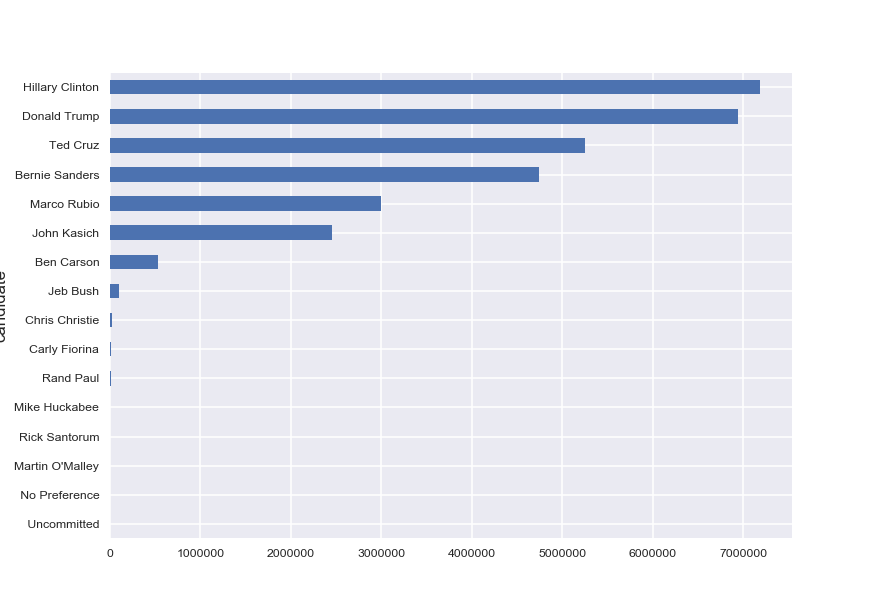

In [8]:
candidate_to_votes_s.plot(kind="barh",fontsize=8)

각 주(state)별 정당(party) 득표(votes)비율 계산

In [9]:
state_party_to_votes_s = primary.groupby(["state","party"])["votes"].sum()
state_party_to_votes_s.head

<bound method NDFrame.head of state           party     
Alabama         Democrat       381810
                Republican     805814
Arizona         Democrat       399097
                Republican     435103
Arkansas        Democrat       207182
                Republican     395108
Colorado        Democrat       121184
Florida         Democrat      1611617
                Republican    2156298
Georgia         Democrat       642420
                Republican    1232089
Idaho           Democrat        23567
                Republican     211484
Illinois        Democrat       658976
                Republican     881888
Iowa            Democrat       139682
                Republican     185508
Kentucky        Republican     225709
Louisiana       Democrat       256849
                Republican     240017
Maine           Democrat          101
Massachusetts   Democrat        51613
                Republican      31517
Michigan        Democrat      1159586
                Republican    1

In [10]:
state_votes_s = primary.groupby(["state"])["votes"].sum()

In [11]:
state_votes_s.head()

state
Alabama     1187624
Arizona      834200
Arkansas     602290
Colorado     121184
Florida     3767915
Name: votes, dtype: int64

In [12]:
state_party_to_vote_pcts_s = state_party_to_votes_s/state_votes_s
state_party_to_vote_pcts_s.head()

state     party     
Alabama   Democrat      0.321491
          Republican    0.678509
Arizona   Democrat      0.478419
          Republican    0.521581
Arkansas  Democrat      0.343990
Name: votes, dtype: float64

<IPython.core.display.Javascript object>


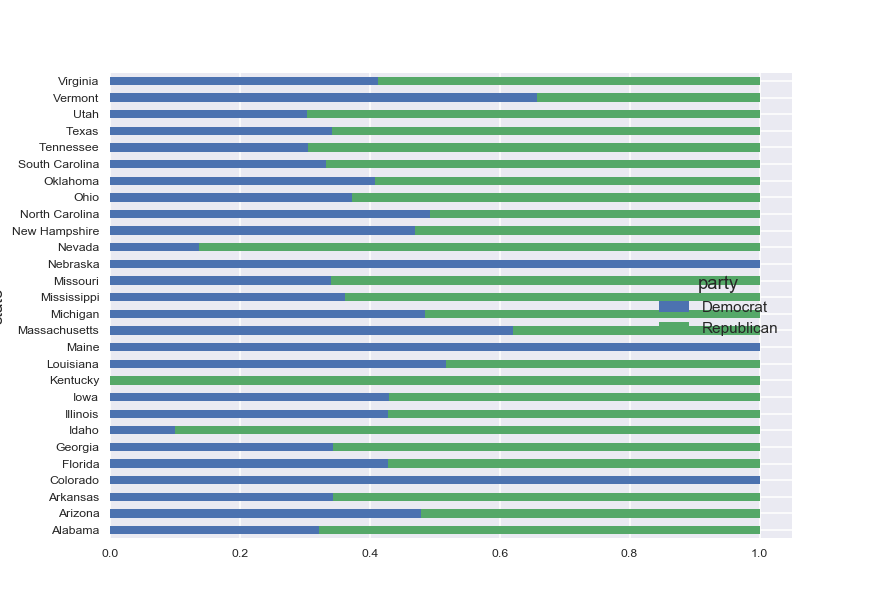

In [30]:
ax1 = state_party_to_vote_pcts_s.unstack().plot(kind="barh",stacked=True, fontsize = 8)

각 후보가 당선된 county 의 평균 백인 유권자 비율 조사

In [14]:
func = lambda agg_df : agg_df.sort_values("votes", ascending=False).iloc[0]

In [15]:
winners=primary.groupby('fips').agg(func)

In [16]:
winners.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes
fips,,,,,,,
1001,Alabama,AL,Autauga,Republican,Donald Trump,5387,0.445
1003,Alabama,AL,Baldwin,Republican,Donald Trump,23618,0.469
1005,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906
1007,Alabama,AL,Bibb,Republican,Donald Trump,1959,0.494
1009,Alabama,AL,Blount,Republican,Donald Trump,7390,0.487


In [17]:
counties["RHI825214"].head()

0    62.1
1    66.2
2    75.6
3    83.0
4    46.6
Name: RHI825214, dtype: float64

In [18]:
counties[["fips","RHI825214"]].head()

,fips,RHI825214
0,0,62.1
1,1000,66.2
2,1001,75.6
3,1003,83.0
4,1005,46.6


In [19]:
winners_county_races = pd.merge(winners, counties[["fips","RHI825214"]],
                                left_index= True, right_on = "fips", how="left")

In [20]:
winners_county_races.head(20)

,state,state_abbreviation,county,party,candidate,votes,fraction_votes,fips,RHI825214
2,Alabama,AL,Autauga,Republican,Donald Trump,5387,0.445,1001,75.6
3,Alabama,AL,Baldwin,Republican,Donald Trump,23618,0.469,1003,83.0
4,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906,1005,46.6
5,Alabama,AL,Bibb,Republican,Donald Trump,1959,0.494,1007,74.5
6,Alabama,AL,Blount,Republican,Donald Trump,7390,0.487,1009,87.8
7,Alabama,AL,Bullock,Democrat,Hillary Clinton,2451,0.913,1011,22.1
8,Alabama,AL,Butler,Democrat,Hillary Clinton,2196,0.921,1013,53.1
9,Alabama,AL,Calhoun,Republican,Donald Trump,8960,0.451,1015,72.9
10,Alabama,AL,Chambers,Democrat,Hillary Clinton,2899,0.886,1017,56.8
11,Alabama,AL,Cherokee,Republican,Donald Trump,2777,0.521,1019,91.6


In [21]:
winners_county_races = winners_county_races.rename(columns = {"RHI825214":"white_pcts"})

In [22]:
winners_county_races.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes,fips,white_pcts
2,Alabama,AL,Autauga,Republican,Donald Trump,5387,0.445,1001,75.6
3,Alabama,AL,Baldwin,Republican,Donald Trump,23618,0.469,1003,83.0
4,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906,1005,46.6
5,Alabama,AL,Bibb,Republican,Donald Trump,1959,0.494,1007,74.5
6,Alabama,AL,Blount,Republican,Donald Trump,7390,0.487,1009,87.8


In [23]:
winners_county_white_pcts=winners_county_races.groupby(["party","candidate"])["white_pcts"].mean()
winners_county_white_pcts

party       candidate      
Democrat    Bernie Sanders     81.944030
            Hillary Clinton    56.856920
Republican  Ben Carson         81.100000
            Donald Trump       83.235638
            John Kasich        89.226415
            Marco Rubio        78.883333
            Ted Cruz           74.164665
Name: white_pcts, dtype: float64

<IPython.core.display.Javascript object>


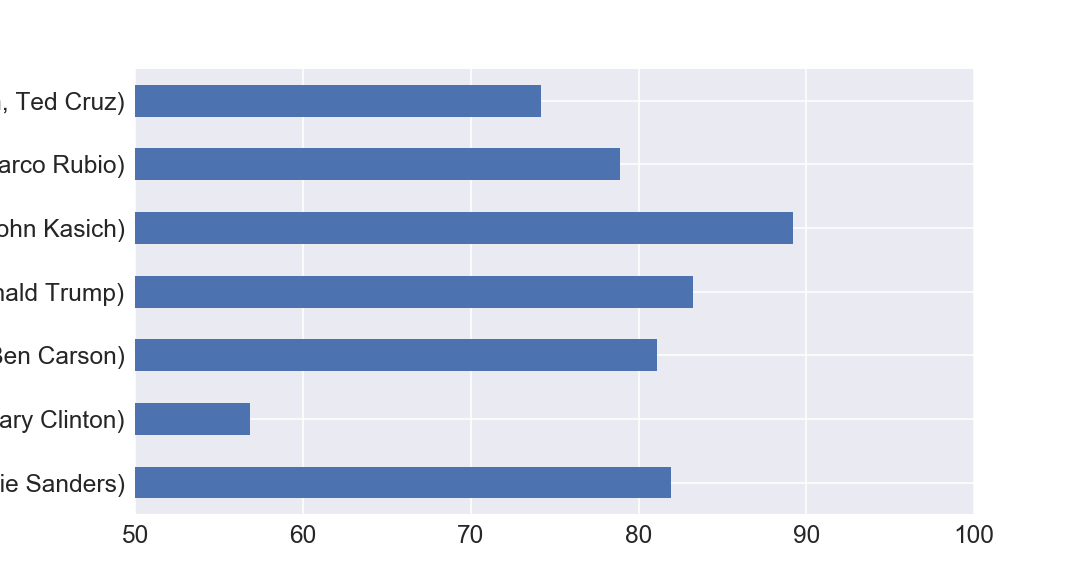

In [24]:
fig2 = plt.figure()
ax2= winners_county_white_pcts.plot(kind="barh", fontsize = 16)

In [25]:
ax2.set_xlim([50,100])

(50, 100)

In [26]:
total_votes=primary.pivot_table(values = "votes", index = "state", columns = "candidate", aggfunc = "sum", fill_value = 0) 

In [31]:
total_votes

candidate,No Preference,Uncommitted,Ben Carson,Bernie Sanders,Carly Fiorina,Chris Christie,Donald Trump,Hillary Clinton,Jeb Bush,John Kasich,Marco Rubio,Martin O'Malley,Mike Huckabee,Rand Paul,Rick Santorum,Ted Cruz
state,,,,,,,,,,,,,,,,
Alabama,0,0,84139,74987,0,0,356892,306823,0,37127,154379,0,0,0,0,173277
Arizona,0,0,0,163400,0,0,249916,235697,0,53040,0,0,0,0,0,132147
Arkansas,0,0,23105,64514,0,0,132546,142668,0,15079,100999,0,0,0,0,123379
Colorado,0,0,0,71928,0,0,0,49256,0,0,0,0,0,0,0,0
Florida,0,0,0,547051,0,0,1015451,1064566,0,150167,607491,0,0,0,0,383189
Georgia,0,0,78731,181760,0,0,490566,460660,0,66740,297748,0,0,0,0,298304
Idaho,0,0,0,18550,0,0,60810,5017,0,16251,34976,0,0,0,0,99447
Illinois,0,0,0,354344,0,0,350991,304632,0,153761,72233,0,0,0,0,304903
Iowa,0,43,17173,69311,3475,3278,45163,69581,5221,3466,42883,747,3300,8460,1773,51316


In [32]:
#fraction_votes : 합계, 인덱스 : state_abb 합 : party, 평균집계 : mean

In [37]:
avg_votes=primary.pivot_table(values = "fraction_votes", index = "state_abbreviation", columns = "party", aggfunc = "mean", fill_value = 0) 

In [52]:
avg_votes

party,Democrat,Republican
state_abbreviation,,
AL,0.476823,0.195277
AR,0.464784,0.191924
AZ,0.478433,0.283867
CO,0.481016,0.000000
FL,0.469349,0.242413
GA,0.493525,0.196939
IA,0.250003,0.090857
ID,0.494733,0.240773
IL,0.489632,0.242013


In [57]:
avg_votes.to_csv("state_votes_mean.csv",sep=",")

In [68]:
winners_county_races_AL = winners_county_races[winners_county_races["state_abbreviation"]=="AL"]

In [76]:
winners_county_races_AL_Rep=winners_county_races_AL[winners_county_races_AL["party"]=="Democrat"]
winners_county_races_AL_Rep.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes,fips,white_pcts
4,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906,1005,46.6
7,Alabama,AL,Bullock,Democrat,Hillary Clinton,2451,0.913,1011,22.1
8,Alabama,AL,Butler,Democrat,Hillary Clinton,2196,0.921,1013,53.1
10,Alabama,AL,Chambers,Democrat,Hillary Clinton,2899,0.886,1017,56.8
13,Alabama,AL,Choctaw,Democrat,Hillary Clinton,1772,0.802,1023,56.1


In [77]:
winners_county_races_AL_Rep.mean()

votes             8080.269231
fraction_votes       0.809769
fips              1072.307692
white_pcts          45.142308
dtype: float64